HABERMAN DATASET:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Objective: To understand which features or which column are useful for classification.

We will perfrom Basic Exploratory Data Analysis and then we will do Both 1D and 2D Analysis on this dataset to get understanding of column which will be useful for classifcation.

In [135]:
#importing all the required libaries to perform EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
#Loading dataset i.e. Haberman Dataset using pandas data structure i.e. Dataframe 
col_names = ["Age","Patient years of Operations","Auxiliary nodes detected","Survival_Status"]
haberman = pd.read_csv("C:/Users/Q840456/AppliedAI/Assignments/haberman.csv", names = col_names)

In [137]:
#We are checking how many datapoint along with column or features are there
print(haberman.shape)

(306, 4)


In [138]:
#so there are 305 records having 4 features.

In [139]:
haberman.head()

,Age,Patient years of Operations,Auxiliary nodes detected,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [140]:
haberman.tail()

,Age,Patient years of Operations,Auxiliary nodes detected,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [141]:
haberman.columns

Index(['Age', 'Patient years of Operations', 'Auxiliary nodes detected',
       'Survival_Status'],
      dtype='object')

Now we will check whether the dataset is Balanced or Imbalanced, this will let us perform analysis easily.

In [142]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

The above analysis says that this is imbalanced dataset which has Status 1 count as 225 and Status 2 counts as 81 which is farily inbalanced, so we need to perfrom data analysis which will be bit different on this imbalanced dataset.

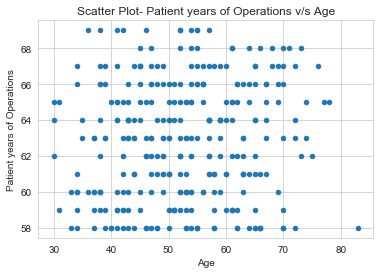

In [143]:
#2-D Scatter Plots
haberman.plot(kind = 'scatter', x = 'Age', y = 'Patient years of Operations')
plt.title("Scatter Plot- Patient years of Operations v/s Age")
plt.show()

OBSERVATIONS:

So according to the scatter plot Age varies from 30 to 80 and Patients years of Operations varies from 1958 to 1968 and looking at scatter plot does provide us proper insight of the data as it is just a scatter of blue dot points. So we can use Seaborn libraies to understand it more.

Using Seaborn to plot the data points so that each points belonging to different class are coloured differently and same class can be coloured same in color.

Plot-1 : X= Age and Y= Patients years of Operations

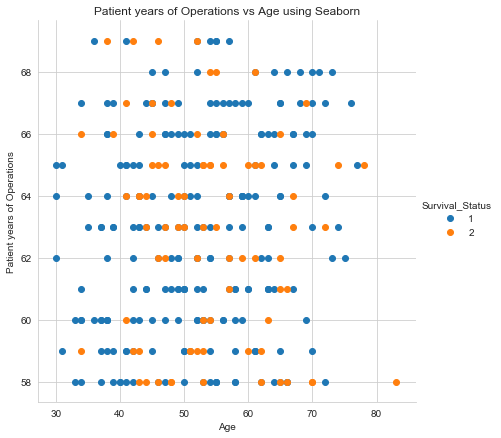

In [144]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Survival_Status", height = 6)\
    .map(plt.scatter, 'Age', 'Patient years of Operations')\
    .add_legend()
plt.title("Patient years of Operations vs Age using Seaborn")
plt.show()

OBSERVATIONS:

Age and Patient years of Operations are insufficient to take any kind of descision from the dataset as it is very tough to seperate both classes.

Now we will use other feature i.e. Age and Auxiliary nodes detected on x and y axis seperately and check whether they can help us to find some seperation on dataset.

In [145]:
#PLOT-2 AGE vs AUXILIARY NODES DETECTED FEATURES using Seaborn

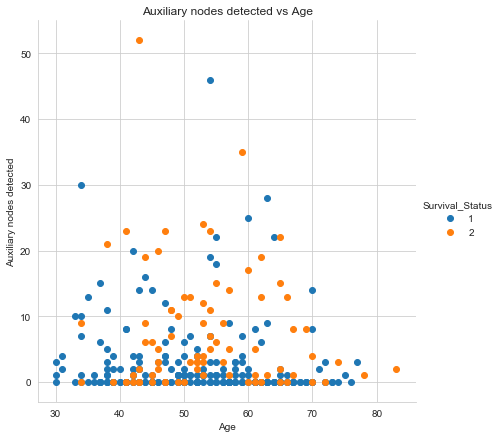

In [146]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 6)\
    .map(plt.scatter, 'Age', 'Auxiliary nodes detected')\
    .add_legend()
plt.title("Auxiliary nodes detected vs Age")
plt.show()

In [147]:
haberman['Auxiliary nodes detected'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Auxiliary nodes detected, dtype: int64

OBSERVATIONS:

So above plot means that we have more auxiliary nodes detected at 0 and 1 and after 20 auxiliary node is very less and after age 70 it has not croseed auxiliary nodes detected as 5. So this two features is also not helping us to predict the line.

Now we will use last features to check i.e. Patient years of Operations vs Auxiliary nodes detected using Seaborn

Plot-3 PATIENT YEARS OF OPERATIONS VS AUXILIARY NODES DETECTED USING SEABORN

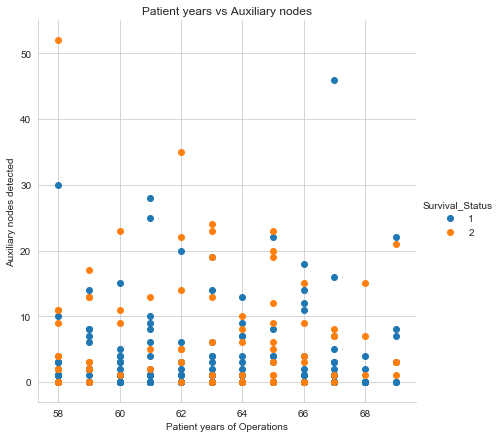

In [148]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 6)\
    .map(plt.scatter, 'Patient years of Operations', 'Auxiliary nodes detected')\
    .add_legend()
plt.title("Patient years vs Auxiliary nodes")
plt.show()

OBSERVATIONS:
    
Nothing can be useful with this features also, so we will use Pairplot where we can use more than two independent variable to figure out which is useful.

# PAIR PLOT

First we will convert Survival_Status value from int to String

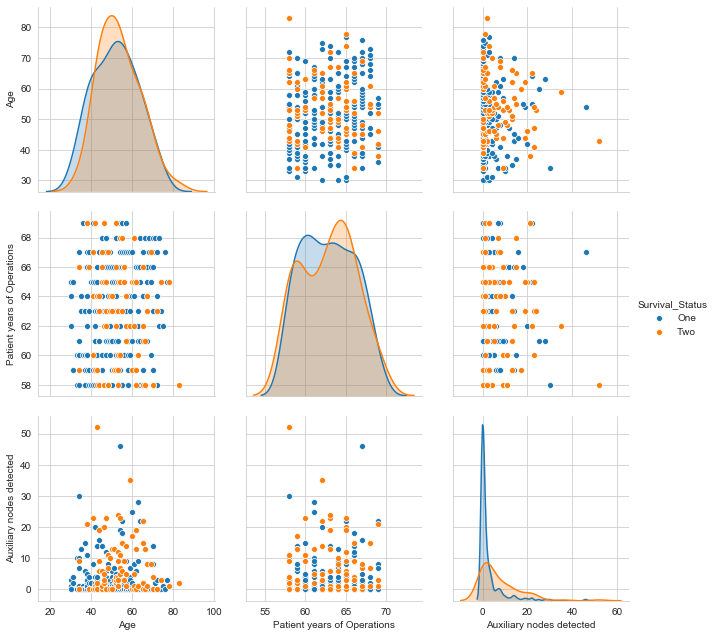

In [150]:
haberman['Survival_Status'] = haberman['Survival_Status'].apply(lambda x: 'One' if x == 1 else 'Two')
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = 'Survival_Status', height = 3)
plt.show()

OBSERVATIONS:
    
No two points is giving any information using Pair plot.

# Histogram, PDF and CDF

Plotting Histogram with all features seperately to check how given features seperates.

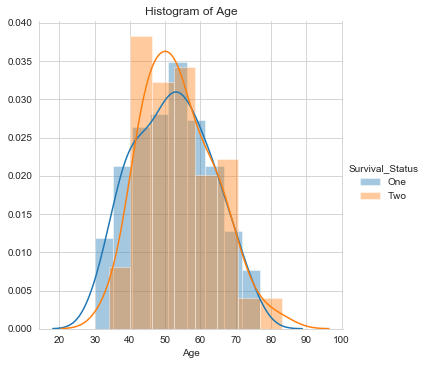

In [157]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 5)\
    .map(sns.distplot, 'Age')\
    .add_legend()
plt.title('Histogram of Age')
plt.show()

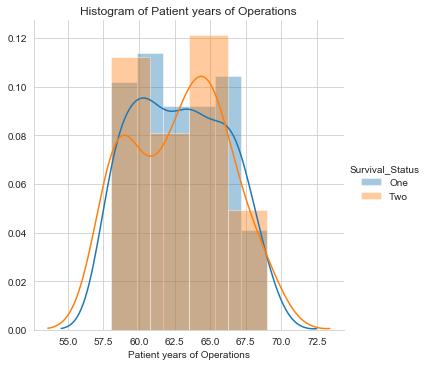

In [160]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 5)\
    .map(sns.distplot, 'Patient years of Operations')\
    .add_legend()
plt.title("Histogram of Patient years of Operations")
plt.show()

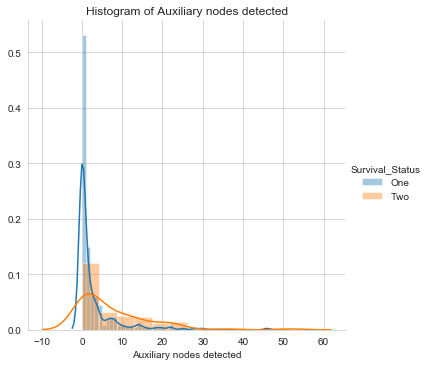

In [161]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 5)\
    .map(sns.distplot, 'Auxiliary nodes detected')\
    .add_legend()
plt.title("Histogram of Auxiliary nodes detected")
plt.show()

OBERSVATIONS:

All 3 histogram is looking very crazy type as it is not helping us to get proper insights from dataset using seperate features.

# CDF

PDF and CDF of age for State- 1 where people survied more than 5 years 

Deciding number of bins (checked the link given in a reply done by AAIC team on a comment, the video in that link said, we generally choose 5 to 20 bins- 5 more small datasets and 20 for big. In the lecture video, 10 bins were chosen for 150 datapoints, and 306 datapoints do not compare to big datasets, I stick to 10 bins).

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


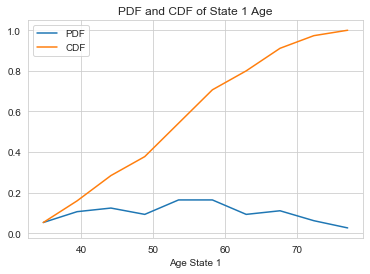

In [164]:
haberman_state_1 = haberman[haberman['Survival_Status'] == 'One']

count, bin_edges = np.histogram(haberman_state_1['Age'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Age State 1')
plt.title('PDF and CDF of State 1 Age')
plt.legend()
plt.show()

OBSERVATIONS:

From above plot we can say for PDF people who survived more than 5 years are in between age 50 to 60 and for CDF 80% people or 0.8% people are under age 61 to 65 approximately.

PDF and CDF for STATE-2 people who would survied 5 years

[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


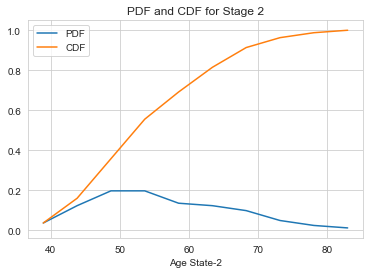

In [168]:
haberman_state_2 = haberman[haberman['Survival_Status'] == 'Two']

count, bin_edges = np.histogram(haberman_state_2['Age'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label= 'CDF')
plt.xlabel('Age State-2')
plt.title('PDF and CDF for Stage 2')
plt.legend()
plt.show()

OBSERVATIONS:

There is no much difference in both State1 and State2

Plotting both state together.

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


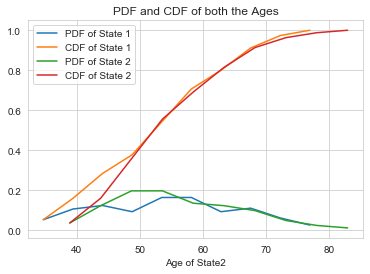

In [171]:
count, bin_edges = np.histogram(haberman_state_1['Age'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.title("PDF and CDF of both the Ages")
plt.plot(bin_edges[1:], pdf, label = 'PDF of State 1')
plt.plot(bin_edges[1:], cdf, label = 'CDF of State 1')
plt.xlabel("Age of State 1")

count, bin_edges = np.histogram(haberman_state_2['Age'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF of State 2')
plt.plot(bin_edges[1:], cdf, label = 'CDF of State 2')
plt.xlabel('Age of State2')
plt.legend()
plt.show()

It is very difficult using age to distinguis classes of Survival

Now we will use Patient Years of Operations feature for PDF and CDF

PDF and CDF of PYOO for State- 1 where people survied more than 5 years 

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


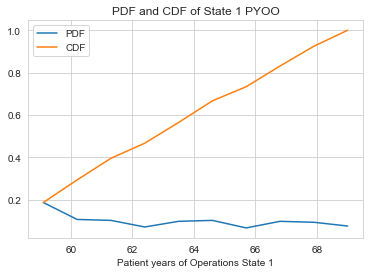

In [172]:
haberman_state_1 = haberman[haberman['Survival_Status'] == 'One']

count, bin_edges = np.histogram(haberman_state_1['Patient years of Operations'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Patient years of Operations State 1')
plt.title('PDF and CDF of State 1 PYOO')
plt.legend()
plt.show()

PDF and CDF of PYOO for State- 2 where people survied more than 5 years

[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


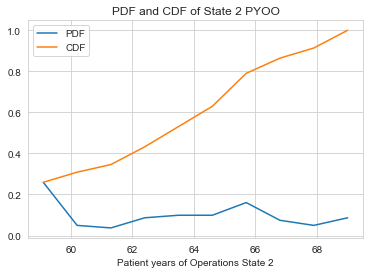

In [173]:
haberman_state_2 = haberman[haberman['Survival_Status'] == 'Two']

count, bin_edges = np.histogram(haberman_state_2['Patient years of Operations'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Patient years of Operations State 2')
plt.title('PDF and CDF of State 2 PYOO')
plt.legend()
plt.show()

Combining both in one State1 and State 2 for Patient years of Operations

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


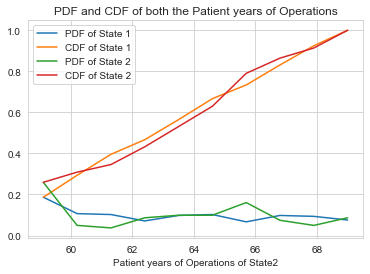

In [174]:
count, bin_edges = np.histogram(haberman_state_1['Patient years of Operations'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.title("PDF and CDF of both the Patient years of Operations")
plt.plot(bin_edges[1:], pdf, label = 'PDF of State 1')
plt.plot(bin_edges[1:], cdf, label = 'CDF of State 1')
plt.xlabel("Patient years of Operations of State 1")

count, bin_edges = np.histogram(haberman_state_2['Patient years of Operations'], bins = 10, density = True)
print(count)
print(bin_edges)

pdf = count/sum(count)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF of State 2')
plt.plot(bin_edges[1:], cdf, label = 'CDF of State 2')
plt.xlabel('Patient years of Operations of State2')
plt.legend()
plt.show()

OBSERVATIONS:

Its not possible to derive any thing using this Patient years of Operations features also as both look similar while plotting for Patient years of Operations and there is no descrete difference found. 

# BOX PLOTS

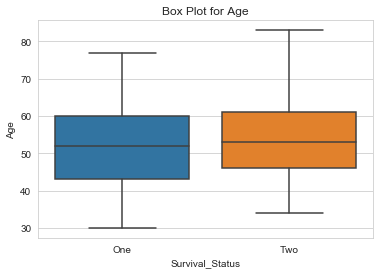

In [175]:
sns.boxplot(x = 'Survival_Status', y = 'Age', data= haberman)
plt.title("Box Plot for Age")
plt.show()

OBSERVATIONS:

For State - 1: Age = 60 is the 75th percentile, so 75 percentile of the datapoints are of age less than 60 who survived for more than 5 years. 50th percentile looks to be 51 to 53 (less than 55), while 25th percentile value is some value less than 45. Most of the datapoints lie within 30 and around 78 (i.e., within the whiskers i.e. black line)

For State -2: 75th percentile is little more than 60 (looks like 61 to 62), 50th percentile is almost the same value as the 50th percentile of state 1. 25th percentile is some value more than 45. Most of the datapoints lie within less than 85 and around 35 (ie, within the whiskers).

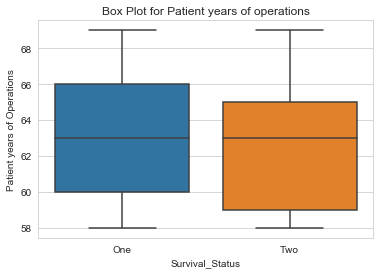

In [176]:
sns.boxplot(x = 'Survival_Status', y = 'Patient years of Operations', data = haberman)
plt.title("Box Plot for Patient years of operations")
plt.show()

OBSERVATIONS:

For State-1:  Years = 1966 is the 75th percentile, so 75 percentile of the datapoints are of year less than 1966 who survived for more than 5 years. 50th percentile looks to be 1963, while 25th percentile value is 1960.

For State3-2: Years = 1965 is 75 th percentile, so 75 percentile of datapoints are of year less than 1965 who would survived for 5 years. 50 th percentile is same as state-1 i.e. 1963 and 25th percentile value is 1959.

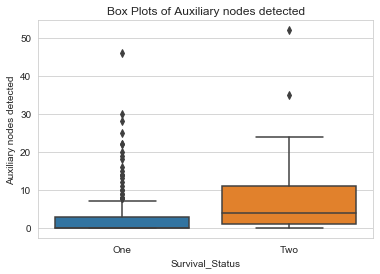

In [178]:
sns.boxplot(x = 'Survival_Status', y = 'Auxiliary nodes detected', data = haberman)
plt.title("Box Plots of Auxiliary nodes detected")
plt.show()

OBSERVATIONS:

For State-1: The 75th percentiles seems 4, that is 75% percent of the people who underwent surgery and survived for more than 5 years had less than atleat 5 axillary nodes detected. Since the top whisker is below 10, so most people has less than 10 detections of axillary nodes.

We do not, however get 3 lines in the box for state - 1 as we normally do. Let us check what is the median and 25th percentile in the following cell.

In [179]:
print(np.median(haberman_state_1['Auxiliary nodes detected']))
print(np.percentile(haberman_state_1['Auxiliary nodes detected'], 25))

#also we check mean
print(np.mean(haberman_state_1['Auxiliary nodes detected']))

0.0
0.0
2.7911111111111113


so here 25th percentile and median is same i.e. Zero so we can say tthat there are 50%  people in state 1 who has zero auxiliary node detections and such a mean deviations let us know  that outliers is present.

For State-2: 75 percentile looks more than 10 and 50 percentile is more than 75th percentile of state-1.

# VIOLIN PLOT

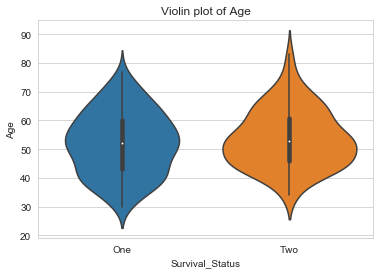

In [180]:
sns.violinplot(x = 'Survival_Status', y= 'Age', data = haberman)
plt.title("Violin plot of Age")
plt.show()

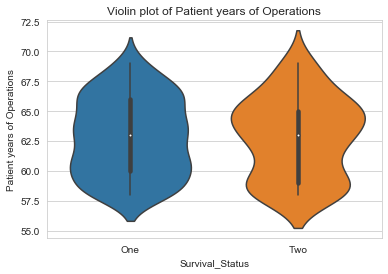

In [181]:
sns.violinplot(x = 'Survival_Status', y= 'Patient years of Operations', data = haberman)
plt.title("Violin plot of Patient years of Operations")
plt.show()

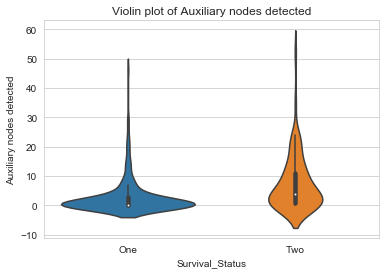

In [182]:
sns.violinplot(x = 'Survival_Status', y= 'Auxiliary nodes detected', data = haberman)
plt.title("Violin plot of Auxiliary nodes detected")
plt.show()

OBSERVATIONS:
violin plot black part going vertical across the centre.